In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

example_data = pd.read_csv("ExampleDataset.csv", header=0, sep=",")
print(example_data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [2]:
example_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [3]:
example_data.dropna(inplace=True)
print(example_data)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[164 rows x 4 columns]


**Regression**

A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables. A regression model is able to show whether changes observed in the dependent variable are associated with changes in one or more of the explanatory variables.

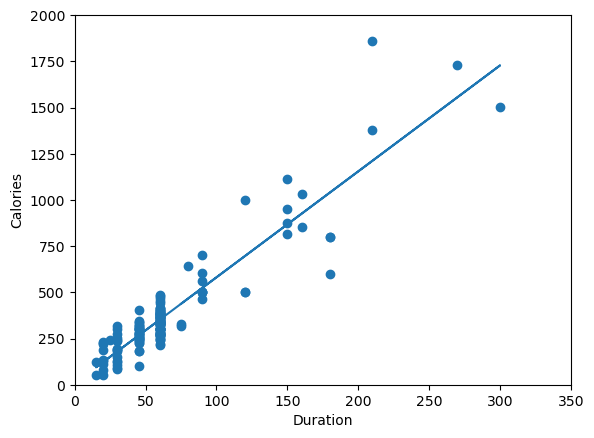

In [4]:
x = example_data["Duration"]
y = example_data["Calories"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=2000)
plt.xlim(xmin=0, xmax=350)
plt.xlabel("Duration")
plt.ylabel ("Calories")
plt.show()

### Linear regression
**Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.**

**Let's say the weight of the person is linearly related to their height. So, this shows a linear relationship between the height and weight of the person. According to this, as we increase the height, the weight of the person will also increase.**

**Linear regression can be used for various purposes, such as predicting future values of the dependent variable, understanding the relationship between variables, and determining the strength and direction of the relationship between variables.**

Map in Python is a function that works as an iterator to return a result after applying a function to every item of an iterable (tuple, lists, etc.). It is used when you want to apply a single transformation function to all the iterable elements. 

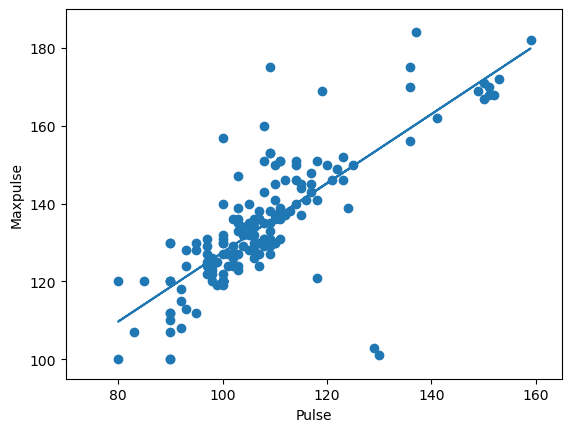

In [5]:
x = example_data["Pulse"]
y = example_data["Maxpulse"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=95, ymax=190)
plt.xlim(xmin=70, xmax=165)
plt.xlabel("Pulse")
plt.ylabel ("Maxpulse")
plt.show()

### Regression Table

The output from linear regression can be summarized in a regression table.

The content of the table includes:

**Information about the model**

**Coefficients of the linear regression function**

**Regression statistics**

**Statistics of the coefficients from the linear regression function**

**Other information that we will not cover in this module**

In [13]:
import pandas as pd
import statsmodels.formula.api as smf

example_data = pd.read_csv("ExampleDataset.csv", header=0, sep=",")

model = smf.ols('Pulse ~ Maxpulse', data = example_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Pulse   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     270.9
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           8.60e-37
Time:                        11:10:32   Log-Likelihood:                -609.89
No. Observations:                 169   AIC:                             1224.
Df Residuals:                     167   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4635      5.692      2.541      0.0

Here we should import the library **statsmodels.formula.api as smf**. Statsmodels is a statistical library in Python.Statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform statistical tests.

There first block gives us the general overview of fitted model. Second block gives us information about the estimates of the beta values. And finally the last block tells us more about the distribution of the fitted model.

### The "Information Part" in Regression Table

**Dep. Variable:** is short for "Dependent Variable". Pulse is here the dependent variable. The Dependent variable is here assumed to be explained by Maxpulse.

**Model:** OLS is short for Ordinary Least Squares. This is a type of model that uses the Least Square method.

**Date:** and **Time:** shows the date and time the output was calculated in Python.

### The "Coefficients Part" in Regression Table

**Coef** is short for coefficient. It is the output of the linear regression function.This column contains the estimated regression coefficients for each predictor variable. These coefficients represent the change in the dependent variable for a one-unit change in the corresponding predictor variable, holding all other variables constant.

The linear regression function can be rewritten mathematically as:

Pulse = 0.6938 * Maxpulse + 14.4635

These numbers means:

If Maxpulse increases by 1, Pulse increases by 0.6938 (or 0,7 rounded)

If Maxpulse = 0, the Pulse is equal to 14.4635 (or 14.5 rounded).

Remember that the intercept is used to adjust the model's precision of predicting!

#### The "Statistics of the Coefficients Part" in Regression Table

Now, we want to test if the coefficients from the linear regression function has a significant impact on the dependent variable.

There are four components that explains the statistics of the coefficients:

**std err** stands for Standard Error.This column provides the standard error of the coefficient estimates. It measures the variability of the coefficient estimate across different samples and is used to calculate the t-value and p-value.

**t** is the "t-value" of the coefficients.This column displays the t-values associated with each coefficient estimate. The t-value is calculated by dividing the coefficient estimate by its standard error. It indicates the number of standard errors the coefficient estimate is away from zero.

**P>|t|** is called the "P-value"

**[0.025  0.975]** represents the confidence interval of the coefficients.These intervals provide a range of plausible values for the true population coefficient with a certain level of confidence (e.g., 95%).

### The P-value



The P-value is a statistical number to conclude if there is a relationship between Pulse and Maxpulse.

We test if the true value of the coefficient is equal to zero (no relationship). The statistical test for this is called Hypothesis testing.

The p-value is a way scientists use to figure out if their results are statistically significant. It tells you the probability of getting results as extreme as the ones you observed if there were no real effect or difference. In simpler terms, it helps you decide if your findings are just due to chance or if there's a meaningful pattern or effect in your data. If the p-value is very low (typically less than 0.05), it suggests that your results are unlikely to be due to chance alone, and there might be something real going on.

A low P-value (< 0.05) means that the coefficient is likely not to equal zero.

A high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable.

A high P-value is also called an insignificant P-value.

#### Hypothesis Testing

When you perform a statistical test, a p-value helps you determine the significance of your results in relation to the null hypothesis.

**The null hypothesis (H0)** states no relationship exists between the two variables being studied (one variable does not affect the other). It states the results are due to chance and are not significant in supporting the idea being investigated. Thus, the null hypothesis assumes that whatever you try to prove did not happen.

**The alternative hypothesis (Ha or H1)** is the one you would believe if the null hypothesis is concluded to be untrue.
The alternative hypothesis states that the independent variable affected the dependent variable, and the results are significant in supporting the theory being investigated (i.e., the results are not due to random chance).

A p-value, or probability value, is a number describing how likely it is that your data would have occurred by random chance (i.e., that the null hypothesis is true).

The level of statistical significance is often expressed as a p-value between 0 and 1.

The smaller the p-value, the less likely the results occurred by random chance, and the stronger the evidence that you should reject the null hypothesis.

Remember, a p-value doesn’t tell you if the null hypothesis is true or false. It just tells you how likely you’d see the data you observed (or more extreme data) if the null hypothesis was true. It’s a piece of evidence, not a definitive proof.

### R-Squared

It is a measure of how well the independent variables in a regression model explain the variation of the dependent variable.

The value of R-Squared is always between 0 to 1 (0% to 100%).

A high R-Squared value means that many data points are close to the linear regression function line.

A low R-Squared value means that the linear regression function line does not fit the data well

In [7]:
cars_data=pd.read_csv('Cars Data regression.csv',header=0, sep=";")
cars_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790.0,15.6
402,44.0,4,97.0,52.0,2130.0,24.6
403,32.0,4,135.0,84.0,2295.0,11.6
404,28.0,4,120.0,79.0,2625.0,18.6


In [8]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           406 non-null    float64
 1   Cylinders     406 non-null    int64  
 2   Displacement  406 non-null    float64
 3   Horsepower    406 non-null    float64
 4   Weight        406 non-null    float64
 5   Acceleration  406 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.2 KB


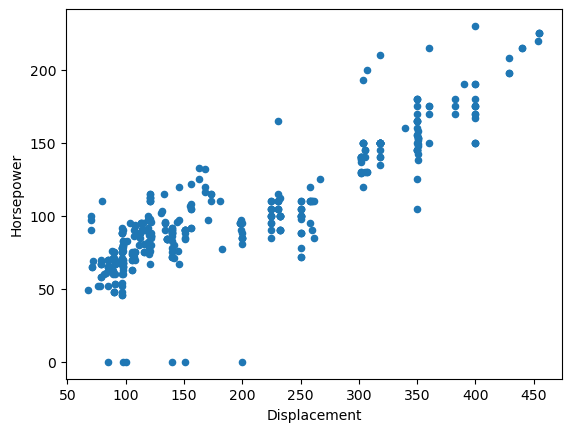

In [9]:
import matplotlib.pyplot as plt

cars_data.plot(x ='Displacement', y='Horsepower', kind='scatter')
plt.show()

In [10]:
Correlation_Matrix = round(cars_data.corr(),2)
print(Correlation_Matrix)

               MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration
MPG           1.00      -0.74         -0.76       -0.73   -0.79          0.42
Cylinders    -0.74       1.00          0.95        0.82    0.90         -0.52
Displacement -0.76       0.95          1.00        0.87    0.93         -0.56
Horsepower   -0.73       0.82          0.87        1.00    0.84         -0.68
Weight       -0.79       0.90          0.93        0.84    1.00         -0.43
Acceleration  0.42      -0.52         -0.56       -0.68   -0.43          1.00


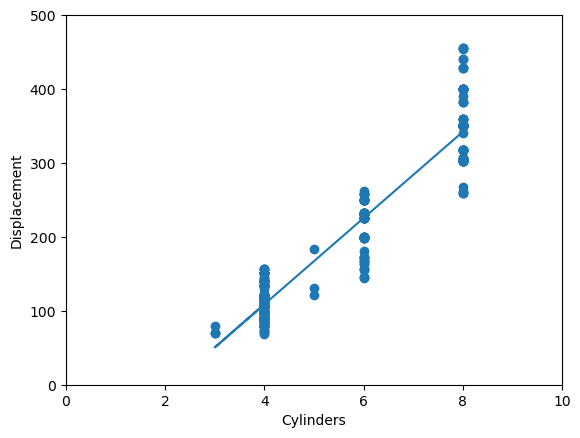

In [11]:
x = cars_data["Cylinders"]
y = cars_data["Displacement"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=0, ymax=500)
plt.xlim(xmin=0, xmax=10)
plt.xlabel("Cylinders")
plt.ylabel ("Displacement")
plt.show()

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

example_data = pd.read_csv('Cars Data regression.csv', header=0, sep=";")

model = smf.ols("Cylinders ~ Displacement", data = example_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Cylinders   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     3889.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.93e-209
Time:                        23:03:20   Log-Likelihood:                -314.15
No. Observations:                 406   AIC:                             632.3
Df Residuals:                     404   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4501      0.055     44.480   

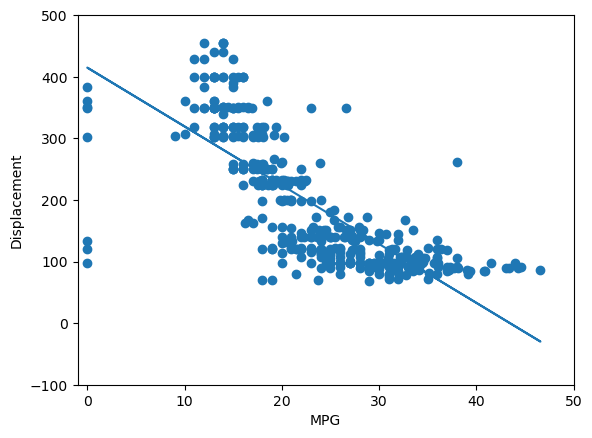

In [12]:
x = cars_data["MPG"]
y = cars_data["Displacement"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
 return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.ylim(ymin=-100, ymax=500)
plt.xlim(xmin=-1, xmax=50)
plt.xlabel("MPG")
plt.ylabel ("Displacement")
plt.show()

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

example_data = pd.read_csv('Cars Data regression.csv', header=0, sep=";")

model = smf.ols("MPG ~ Displacement", data = example_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     567.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.57e-79
Time:                        23:06:57   Log-Likelihood:                -1261.6
No. Observations:                 406   AIC:                             2527.
Df Residuals:                     404   BIC:                             2535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.9718      0.568     61.543   